In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split   
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


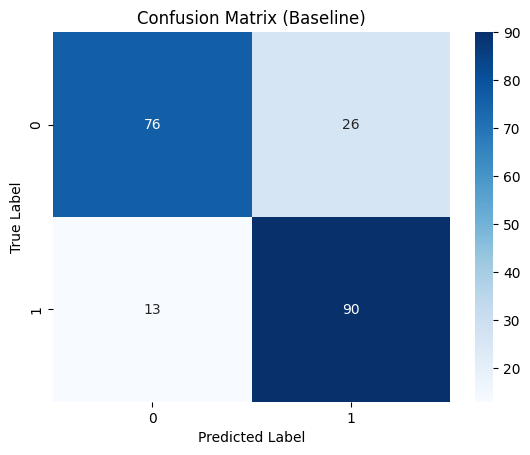

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       102
           1       0.78      0.87      0.82       103

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205



In [7]:
# Drop missing values and duplicates
data.dropna(inplace=True)

# Split data into X and y
X = data.drop('target', axis=1)
y = data['target']

# Define the preprocessor
nominal_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
ordinal_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ordinal_features),
        ('cat', OneHotEncoder(), nominal_features)
    ])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear'))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Baseline)')
plt.savefig('cm_plots/confusion_matrix_baseline.png')
plt.show()


print(classification_report(y_test, y_pred))

Best parameters: {'classifier__C': 0.1, 'classifier__gamma': 1, 'classifier__kernel': 'poly'}
Best cross-validation score: 0.9865853658536585
Training set performance:


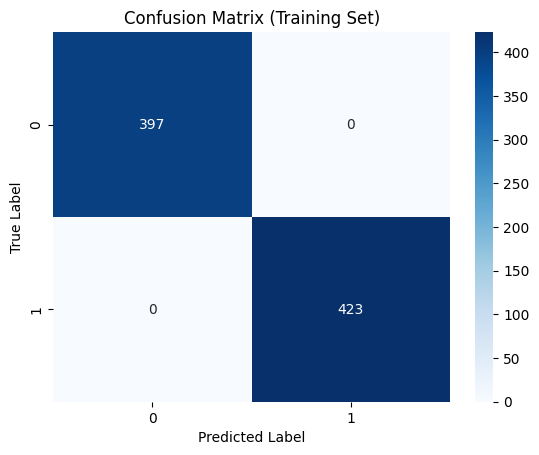

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       423

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820

Test set performance:


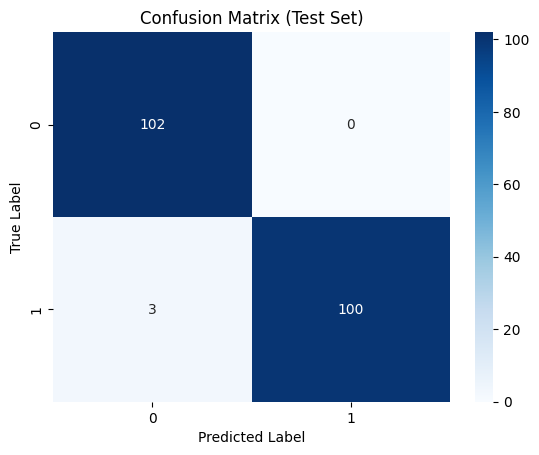

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [6]:
# Define the parameter grid
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01, 0.001],
    'classifier__kernel': ['linear', 'rbf', 'poly']
}

# Create a GridSearchCV object with 10-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

best_model = grid_search.best_estimator_

# Evaluate the best model on the training set
y_train_pred = grid_search.predict(X_train)
print("Training set performance:")
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Training Set)')
plt.savefig('cm_plots/confusion_matrix_train.png')
plt.show()
print(classification_report(y_train, y_train_pred))

# Evaluate the best model on the test set
y_test_pred = grid_search.predict(X_test)
print("Test set performance:")
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)')
plt.savefig('cm_plots/confusion_matrix_test.png')
plt.show()
print(classification_report(y_test, y_test_pred))